In [1]:
import pandas as pd
import numpy as np

In [2]:
census = pd.read_csv('../../datasets/census.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


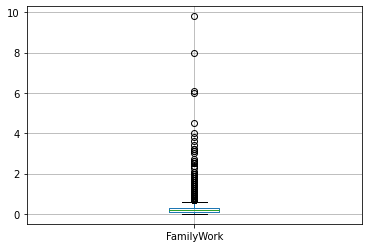

In [4]:
census.boxplot(['FamilyWork']);

In [5]:
q1 = np.percentile(census.FamilyWork, 25)
q3 = np.percentile(census.FamilyWork, 75)
iqr = q3 - q1
upper_fence = q3 + 3*iqr
lower_fence = q3 - 3*iqr
census_without_outliers = census[(census.FamilyWork < upper_fence) & (census.FamilyWork > lower_fence)]

print(q1)
print(q3)
print(iqr)
print(upper_fence)
print(lower_fence)


0.1
0.3
0.19999999999999998
0.8999999999999999
-0.3


In [6]:
census_without_outliers.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [7]:
census_without_outliers.shape

(3022, 37)

In [8]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [10]:
# Cambiar la escala de columnas para que esten expresadas en la misma únidad
# cambiando a una columna
census.HispanicRate = census.Hispanic / 100
census.HispanicRate

0       0.026
1       0.045
2       0.046
3       0.022
4       0.086
        ...  
3215    0.964
3216    0.967
3217    0.997
3218    0.998
3219    0.995
Name: Hispanic, Length: 3220, dtype: float64

In [11]:
# Cambiando la escala a n numero de columnas a la vez
def to_percent(x):
    return (x/100)

conversion_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork']

new_column_list = [x+'Rate' for x in conversion_list]
census[new_column_list] = census[conversion_list].apply(to_percent)

census.BlackRate

0       0.185
1       0.095
2       0.467
3       0.214
4       0.015
        ...  
3215    0.001
3216    0.000
3217    0.000
3218    0.000
3219    0.000
Name: BlackRate, Length: 3220, dtype: float64

In [12]:
# Redondenado las columnas reales
# redondendo una columna
census.NativeRateRounded = round(census.NativeRate, 3)
census.NativeRateRounded

<ipython-input-12-af44a1653133>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  census.NativeRateRounded = round(census.NativeRate, 3)


0       0.004
1       0.006
2       0.002
3       0.004
4       0.003
        ...  
3215    0.000
3216    0.000
3217    0.000
3218    0.000
3219    0.000
Name: NativeRate, Length: 3220, dtype: float64

In [16]:
# Escalando 
from sklearn.preprocessing import MinMaxScaler
census.TotalPopScales = MinMaxScaler().fit_transform(census.TotalPop.values.reshape(-1, 1))
# census.TotalPopScales.describe()

In [17]:
# Creando variables dummy
states = pd.get_dummies(census.State, drop_first=True)
census_dummy = pd.concat([census, states], axis=1)
census_dummy.columns.values

array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ProfessionalRate',
       'ServiceRate', 'OfficeRate', 'ConstructionRate', 'ProductionRate',
       'DriveRate', 'CarpoolRate', 'TransitRate', 'WalkRate',
       'OtherTranspRate', 'WorkAtHomeRate', 'EmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
      

In [31]:
# shuffling - generar orden aleatorio de los datos
shuffle_census = census.sample(frac=1)
shuffle_census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
237,6103,California,Tehama,63152,31489,31663,23.5,70.1,0.5,1.8,...,0.146,0.765,0.123,0.004,0.038,0.019,0.050,231.27,0.701,0.201
2997,54011,West Virginia,Cabell,96824,47123,49701,1.3,90.3,4.7,0.2,...,0.098,0.822,0.079,0.011,0.041,0.025,0.022,401.03,0.794,0.168
2447,47039,Tennessee,Decatur,11686,5687,5999,3.0,91.9,2.8,0.0,...,0.192,0.875,0.063,0.001,0.016,0.010,0.035,45.69,0.637,0.251
467,13163,Georgia,Jefferson,16374,7916,8458,3.3,41.8,54.3,0.1,...,0.244,0.783,0.140,0.006,0.029,0.005,0.037,50.97,0.686,0.242
1165,22105,Louisiana,Tangipahoa,125486,60890,64596,3.8,63.9,29.6,0.3,...,0.139,0.794,0.131,0.005,0.015,0.027,0.029,536.85,0.788,0.163


In [34]:
# barajando el dataset usando proporción
census_prop_sample = census.sample(frac=0.5)
census_prop_sample.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
791,19005,Iowa,Allamakee,14060,7169,6891,5.4,92.0,0.7,0.1,...,0.204,0.760,0.107,0.001,0.066,0.014,0.051,69.04,0.779,0.101
2421,46121,South Dakota,Todd,9942,4862,5080,3.7,10.0,0.3,74.4,...,0.071,0.583,0.180,0.010,0.060,0.050,0.117,29.01,0.344,0.550
848,19119,Iowa,Lyon,11723,5951,5772,2.5,96.3,0.1,0.2,...,0.145,0.798,0.079,0.000,0.054,0.003,0.066,59.68,0.768,0.121
1943,37107,North Carolina,Lenoir,58782,27973,30809,7.1,50.5,39.5,0.3,...,0.194,0.778,0.166,0.008,0.024,0.005,0.019,239.72,0.729,0.202
1278,26095,Michigan,Luce,6477,3788,2689,2.6,79.2,8.3,6.7,...,0.161,0.776,0.117,0.000,0.052,0.016,0.037,21.03,0.716,0.238


In [39]:
# barajando usando numero de renglones
census_size_sample = census.sample(n=1000)
census_size_sample

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
1815,35037,New Mexico,Quay,8698,4216,4482,44.0,51.5,2.2,0.4,...,0.118,0.760,0.133,0.001,0.010,0.022,0.075,29.37,0.670,0.238
1637,30079,Montana,Prairie,1372,733,639,0.8,96.1,0.0,1.1,...,0.068,0.570,0.146,0.000,0.072,0.011,0.200,5.43,0.464,0.236
413,13055,Georgia,Chattooga,25241,13007,12234,4.6,82.6,10.7,0.1,...,0.281,0.867,0.088,0.005,0.014,0.006,0.018,89.76,0.813,0.110
2541,48037,Texas,Bowie,93155,47014,46141,7.1,65.2,23.9,0.8,...,0.142,0.846,0.100,0.005,0.010,0.017,0.021,359.59,0.755,0.194
228,6085,California,Santa Clara,1868149,939004,929145,26.6,33.6,2.4,0.2,...,0.082,0.760,0.104,0.039,0.020,0.032,0.046,9156.19,0.843,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,4013,Arizona,Maricopa,4018143,1986158,2031985,30.1,57.3,4.9,1.6,...,0.095,0.765,0.110,0.024,0.016,0.026,0.059,18210.38,0.825,0.117
1646,30097,Montana,Sweet Grass,3633,1772,1861,1.8,94.3,0.2,0.0,...,0.093,0.644,0.089,0.054,0.077,0.023,0.114,16.13,0.676,0.167
2792,49031,Utah,Piute,1865,1023,842,5.4,93.2,0.2,0.0,...,0.075,0.753,0.104,0.000,0.034,0.045,0.065,6.53,0.613,0.319
1920,37061,North Carolina,Duplin,59453,29280,30173,21.2,52.2,24.8,0.3,...,0.228,0.775,0.176,0.000,0.015,0.010,0.025,246.54,0.765,0.150


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
census_train, census_test = train_test_split(census, test_size=0.2)
census_train

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
2525,48005,Texas,Angelina,87748,42886,44862,20.9,61.9,14.9,0.1,...,0.167,0.827,0.126,0.001,0.014,0.015,0.016,361.82,0.762,0.178
2406,46091,South Dakota,Marshall,4701,2443,2258,4.8,83.4,0.6,9.0,...,0.148,0.691,0.169,0.000,0.076,0.006,0.057,23.94,0.677,0.180
255,8021,Colorado,Conejos,8249,4111,4138,54.4,43.3,0.1,1.6,...,0.122,0.774,0.127,0.006,0.025,0.010,0.057,30.21,0.658,0.213
2943,51750,Virginia,Radford city,17057,8211,8846,3.0,83.5,9.2,0.0,...,0.109,0.762,0.098,0.005,0.109,0.019,0.008,67.97,0.764,0.190
612,17035,Illinois,Cumberland,10943,5509,5434,1.0,97.1,0.2,0.2,...,0.219,0.814,0.087,0.001,0.025,0.005,0.067,49.32,0.797,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,48085,Texas,Collin,862215,423260,438955,15.0,60.8,8.9,0.3,...,0.057,0.816,0.072,0.011,0.008,0.014,0.078,4441.89,0.841,0.100
541,13313,Georgia,Whitfield,103456,51451,52005,33.1,60.5,3.9,0.2,...,0.335,0.845,0.100,0.004,0.012,0.018,0.021,453.45,0.866,0.094
832,19087,Iowa,Henry,20080,10254,9826,4.4,88.9,2.3,0.3,...,0.201,0.835,0.076,0.002,0.028,0.018,0.042,89.92,0.752,0.181
1663,31019,Nebraska,Buffalo,47958,23881,24077,8.3,87.9,1.1,0.2,...,0.150,0.794,0.107,0.001,0.040,0.015,0.043,272.63,0.792,0.137


In [42]:
census_test

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
2071,39057,Ohio,Greene,164192,80590,83602,2.6,84.4,7.1,0.1,...,0.104,0.840,0.072,0.004,0.033,0.009,0.043,761.09,0.737,0.212
2558,48071,Texas,Chambers,37251,18691,18560,20.9,68.4,7.9,0.2,...,0.196,0.854,0.093,0.000,0.007,0.022,0.024,151.66,0.779,0.159
492,13215,Georgia,Muscogee,200285,98321,101964,7.3,42.4,44.2,0.3,...,0.125,0.783,0.104,0.012,0.011,0.017,0.073,785.31,0.756,0.203
1389,27151,Minnesota,Swift,9525,4803,4722,4.1,93.4,1.5,0.3,...,0.204,0.756,0.091,0.006,0.063,0.018,0.067,48.65,0.725,0.148
1822,35051,New Mexico,Sierra,11615,5822,5793,29.1,66.9,0.5,0.5,...,0.119,0.805,0.109,0.001,0.030,0.004,0.052,39.71,0.595,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,29053,Missouri,Cooper,17593,9328,8265,1.5,88.7,6.1,0.2,...,0.148,0.826,0.106,0.001,0.026,0.006,0.035,79.16,0.766,0.157
2253,42019,Pennsylvania,Butler,185689,91628,94061,1.3,95.3,1.1,0.1,...,0.134,0.846,0.072,0.007,0.025,0.007,0.042,918.88,0.849,0.098
530,13291,Georgia,Union,21725,10648,11077,2.9,94.3,0.5,0.2,...,0.087,0.859,0.082,0.000,0.019,0.009,0.031,72.91,0.710,0.189
3043,54103,West Virginia,Wetzel,16157,7931,8226,0.6,97.8,0.1,0.0,...,0.173,0.854,0.087,0.000,0.031,0.006,0.022,55.48,0.797,0.172
